In [13]:
import numpy as np
import pandas as pd
%matplotlib notebook

In [18]:
n = str(1) #chiller number
df = pd.read_csv("data/Chiller"+n+"_full.csv")
df.index = pd.to_datetime(df['ts'])
df.drop('ts', axis=1, inplace=True)
df.head()

,ch1Watt,ch2Watt,ch3Watt,value1,value2,value3,value4,conflowRate,conflowSpeed,evaflowRate,evaflowSpeed
ts,,,,,,,,,,,
2017-05-01 00:00:00,349,0,353,18.068238,20.535583,23.376769,23.387453,0.000000,0.000000,0.000000,0.00000
2017-05-01 00:01:00,383,0,396,16.166991,16.914672,22.565002,22.639772,35.284023,0.303604,0.000000,0.00000
2017-05-01 00:02:00,379,0,394,15.964052,16.722413,22.372743,22.351379,144.330154,1.241898,0.000000,0.00000
2017-05-01 00:03:00,389,0,408,17.053528,17.822570,22.265932,22.372743,195.770782,1.684522,10.812524,0.16108
2017-05-01 00:04:00,5748,4480,4942,18.559570,19.531554,22.415465,22.490235,214.631348,1.846809,77.101921,1.14863


In [34]:
import datetime
train = df.loc[:datetime.date(year=2017,month=11,day=1)]
X_train = train.drop(['ch1Watt','ch2Watt','ch3Watt'],axis=1).as_matrix()
y_train = train[['ch1Watt','ch2Watt','ch3Watt']].as_matrix()

test = df.loc[datetime.date(year=2017,month=11,day=1):]
X_test = test.drop(['ch1Watt','ch2Watt','ch3Watt'],axis=1).as_matrix()
y_test = test[['ch1Watt','ch2Watt','ch3Watt']].as_matrix()

In [36]:
from sklearn.ensemble import RandomForestRegressor
regr_rf = RandomForestRegressor()
regr_rf.fit(X_train, y_train)

y_rf = regr_rf.predict(X_test)

<IPython.core.display.Javascript object>


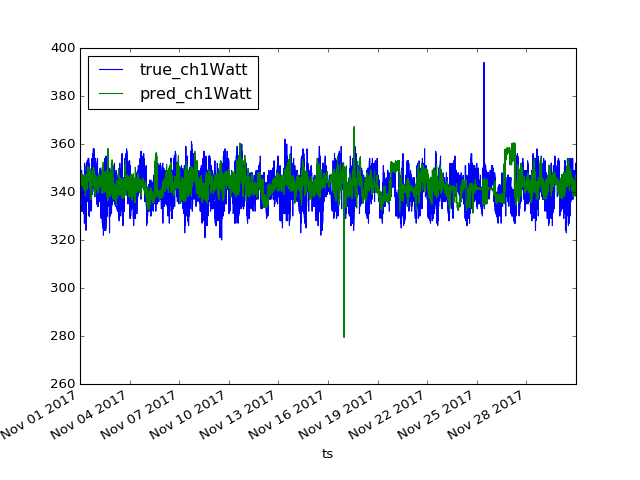

In [52]:
y_test_df = pd.DataFrame(np.concatenate((y_test, y_rf), axis=1))
y_test_df.columns=['true_ch1Watt', 'true_ch2Watt', 'true_ch3Watt','pred_ch1Watt', 'pred_ch2Watt', 'pred_ch3Watt']
y_test_df.index=test.index
y_test_df[['true_ch1Watt', 'pred_ch1Watt']].plot()

<IPython.core.display.Javascript object>


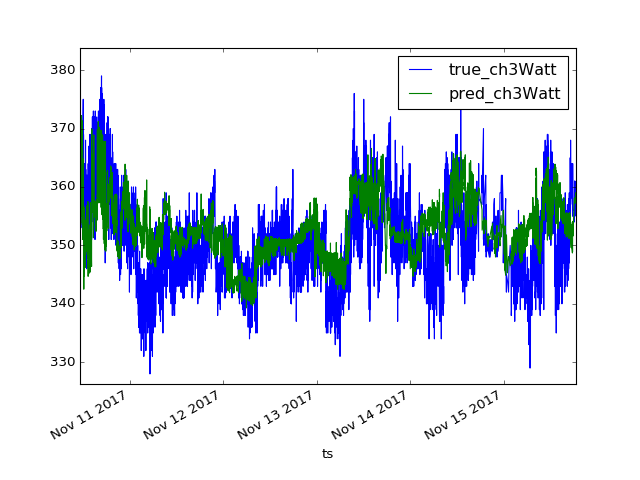

In [53]:
y_test_df[['true_ch3Watt', 'pred_ch3Watt']].plot()

In [54]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_rf)

34.399250377797863